# Análisis de Datos Espaciales con Python

In [ ]:
import pandas as pd
import geopandas
import numpy as np
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 

# 1. Datos Espaciales 101

## 1.1 Formatos de datos espaciales

In [66]:
#Importar Shapefile
salud_rd = geopandas.read_file('datos/salud_y_discapacidad_mun/MUNICIPIOS_SALUD_Y_DISCAPACIDAD.shp')

salud_rd.head(3)

,FID,OBJECTID_1,OBJECTID,COD_PROV,DES_PROV,COD_MUNI,DES_MUNI,Shape_Leng,Shape_Le_1,Shape_Area,ENLACE,Discapacid,Hipertensi,Diabetes,Enf_respir,Shape__Are,Shape__Len,geometry
0,1,1,1,01,DISTRITO NACIONAL,01,SANTO DOMINGO DE GUZMÁN,54335.048398,54335.048398,8.990852e+07,0101,30953,56036,19042,23206,1.005508e+08,57451.050580,"POLYGON ((-69.97480 18.54527, -69.97462 18.545..."
1,2,2,2,02,AZUA,01,AZUA,176612.013838,176612.013838,4.161708e+08,0201,4731,8489,2369,1612,4.647825e+08,186636.566786,"MULTIPOLYGON (((-70.91044 18.38876, -70.90853 ..."
2,3,3,3,02,AZUA,02,LAS CHARCAS,81577.524298,81577.524298,2.464431e+08,0202,810,1047,354,217,2.752046e+08,86230.903473,"POLYGON ((-70.57286 18.49798, -70.57090 18.497..."


In [67]:
#Importar GeoJson
geopandas.read_file('datos/healthsites.geojson').head(3)

,osm_id,osm_type,completeness,is_in_health_zone,amenity,speciality,addr_street,operator,water_source,changeset_id,...,name,staff_nurses,changeset_user,wheelchair,beds,url,dispensing,healthcare,operator_type,geometry
0,316143214,way,12.0,,pharmacy,,,,,31562708,...,Carol,,jcfondeur,,,,,,,"POLYGON ((-70.68683 19.46780, -70.68682 19.467..."
1,2339444520,node,12.0,,pharmacy,,Prof. Juan Bosch,,,17169034,...,Farmacia ALLAN,,Jose Espinal,,,,,,,POINT (-70.54037 19.31481)
2,407005634,way,18.0,,clinic,,Marginal de Las Americas,,,38991233,...,Centro Medico Cuevas Leclerc,,FoxyMarcie,,,,,,,"POLYGON ((-69.64270 18.44757, -69.64269 18.447..."


In [68]:
#Importar GeoPackage
geopandas.read_file("datos/PROVCenso2010.gpkg").head(3)

,PROV,REG,TOPONIMIA,ENLACE,geometry
0,01,10,DISTRITO NACIONAL,1001,"POLYGON ((397122.651 2050791.921, 397142.013 2..."
1,02,05,AZUA,0502,"POLYGON ((303931.923 2102011.319, 304050.231 2..."
2,03,06,BAORUCO,0603,"POLYGON ((228656.000 2064458.375, 228810.391 2..."


In [69]:
#Crear un shapefile
salud_rd.to_file("datos/mis_datos.shp")

In [70]:
#Crear un GeoJSON
salud_rd.to_file("datos/mis_datos.geojson", driver='GeoJSON')

In [71]:
#Crear un GeoPackage
salud_rd.to_file("datos/mis_datos.gpkg", driver="GPKG")

# 2. Sistema de coordenadas Geográficas y Proyectadas

In [72]:
salud_rd.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
#PCS Mercator (metros)
salud_rd.to_crs('EPSG:3395').crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Para conocer más detalles sobre los CRS y PCS, visitar: https://epsg.io/

# 3. ¿Como funciona Geopandas?

In [74]:
#En pandas hay DataFrames, en GeoPandas hay GeoDataFrames
type(salud_rd)

geopandas.geodataframe.GeoDataFrame

In [75]:
#En pandas hay Series, en GeoPandas hay GeoSeries
type(salud_rd['geometry'])

geopandas.geoseries.GeoSeries

In [76]:
#Geometría activa
salud_rd.geometry

0      POLYGON ((-69.97480 18.54527, -69.97462 18.545...
1      MULTIPOLYGON (((-70.91044 18.38876, -70.90853 ...
2      POLYGON ((-70.57286 18.49798, -70.57090 18.497...
3      MULTIPOLYGON (((-70.88859 18.53131, -70.88867 ...
4      POLYGON ((-70.86457 19.00241, -70.86403 19.002...
                             ...                        
150    POLYGON ((-69.95777 18.71479, -69.95744 18.714...
151    MULTIPOLYGON (((-69.62473 18.44148, -69.62424 ...
152    POLYGON ((-69.61649 18.67728, -69.61518 18.676...
153    POLYGON ((-69.99397 18.56265, -69.99396 18.562...
154    POLYGON ((-70.14089 18.72891, -70.14015 18.728...
Name: geometry, Length: 155, dtype: geometry

In [77]:
#Cambiar geometría activa
salud_rd.set_geometry('geometry')

,FID,OBJECTID_1,OBJECTID,COD_PROV,DES_PROV,COD_MUNI,DES_MUNI,Shape_Leng,Shape_Le_1,Shape_Area,ENLACE,Discapacid,Hipertensi,Diabetes,Enf_respir,Shape__Are,Shape__Len,geometry
0,1,1,1,01,DISTRITO NACIONAL,01,SANTO DOMINGO DE GUZMÁN,54335.048398,54335.048398,8.990852e+07,0101,30953,56036,19042,23206,1.005508e+08,57451.050580,"POLYGON ((-69.97480 18.54527, -69.97462 18.545..."
1,2,2,2,02,AZUA,01,AZUA,176612.013838,176612.013838,4.161708e+08,0201,4731,8489,2369,1612,4.647825e+08,186636.566786,"MULTIPOLYGON (((-70.91044 18.38876, -70.90853 ..."
2,3,3,3,02,AZUA,02,LAS CHARCAS,81577.524298,81577.524298,2.464431e+08,0202,810,1047,354,217,2.752046e+08,86230.903473,"POLYGON ((-70.57286 18.49798, -70.57090 18.497..."
3,4,4,4,02,AZUA,03,LAS YAYAS DE VIAJAMA,155188.088402,155188.088402,4.310713e+08,0203,1156,1810,469,508,4.823466e+08,164092.024065,"MULTIPOLYGON (((-70.88859 18.53131, -70.88867 ..."
4,5,5,5,02,AZUA,04,PADRE LAS CASAS,151598.431413,151598.431413,5.744142e+08,0204,976,2033,595,424,6.443464e+08,160594.152455,"POLYGON ((-70.86457 19.00241, -70.86403 19.002..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,151,151,151,32,SANTO DOMINGO,03,SANTO DOMINGO NORTE,112787.586984,112787.586984,3.879029e+08,3203,23895,36568,12762,14266,4.344514e+08,119371.385648,"POLYGON ((-69.95777 18.71479, -69.95744 18.714..."
151,152,152,152,32,SANTO DOMINGO,04,BOCA CHICA,76977.479201,76977.479201,1.402356e+08,3204,5768,10354,3570,3959,1.568065e+08,81377.551051,"MULTIPOLYGON (((-69.62473 18.44148, -69.62424 ..."
152,153,153,153,32,SANTO DOMINGO,05,SAN ANTONIO DE GUERRA,96430.139577,96430.139577,2.836423e+08,3205,2473,4408,1156,1604,3.176006e+08,102022.837915,"POLYGON ((-69.61649 18.67728, -69.61518 18.676..."
153,154,154,154,32,SANTO DOMINGO,06,LOS ALCARRIZOS,47789.923406,47789.923406,4.492134e+07,3206,10897,20289,7196,7468,5.026081e+07,50546.766954,"POLYGON ((-69.99397 18.56265, -69.99396 18.562..."


# 4. Mapas y métodos

## 4.1 Mapas con 1 Capa

<AxesSubplot:>

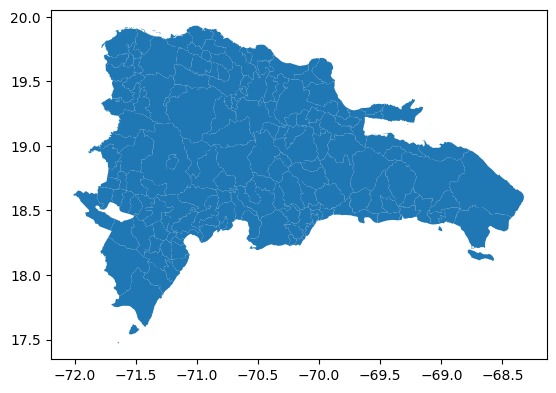

In [78]:
#Mapa simple
salud_rd.plot()

<AxesSubplot:>

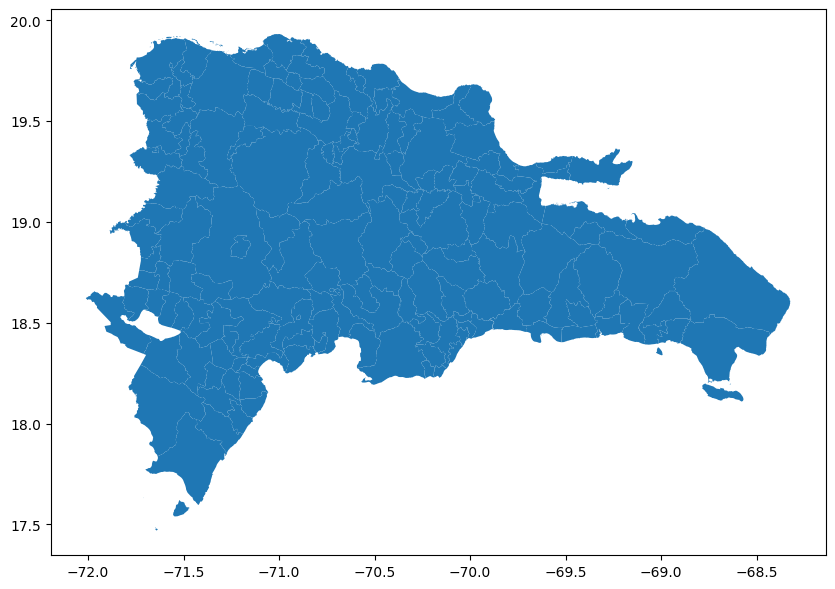

In [79]:
#Ajustar tamaño del mapa
salud_rd.plot(figsize=(10, 10))

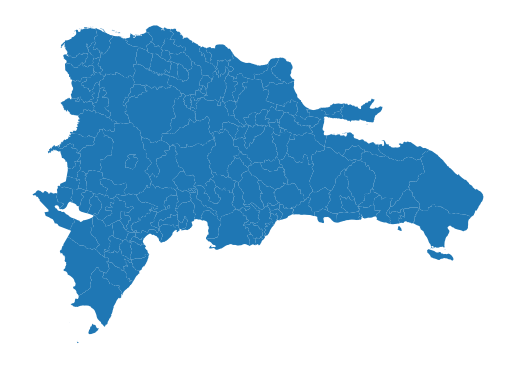

In [80]:
#Eliminar los axis del mapa
salud_rd.plot().set_axis_off()

Text(0.5, 1.0, 'Municipios de la República Dominicana')

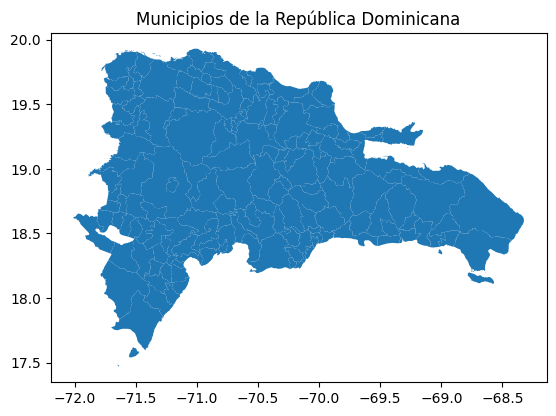

In [81]:
#Colocar un título
salud_rd.plot().set_title('Municipios de la República Dominicana')

<AxesSubplot:>

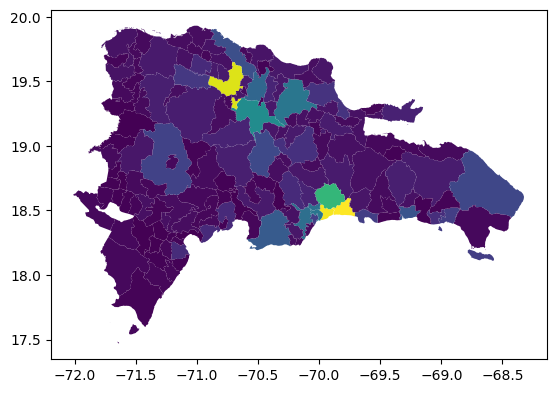

In [82]:
#Gráfica un mapa coroplético
salud_rd.plot(column = 'Diabetes')

<AxesSubplot:>

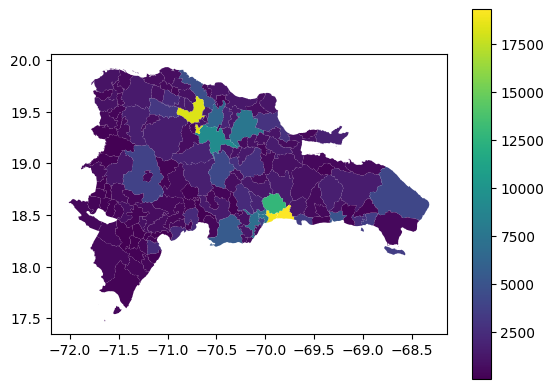

In [83]:
#Graficar un mapa con una leyenda
salud_rd.plot(column = 'Diabetes', legend = True)

<AxesSubplot:>

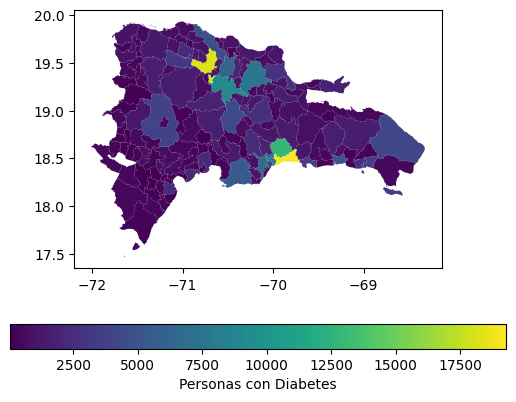

In [84]:
#Hacer cambios a la leyenda de un mapa
salud_rd.plot(column = 'Diabetes',
              legend = True,
              legend_kwds={'label': "Personas con Diabetes",
                           'orientation': "horizontal"})

<AxesSubplot:>

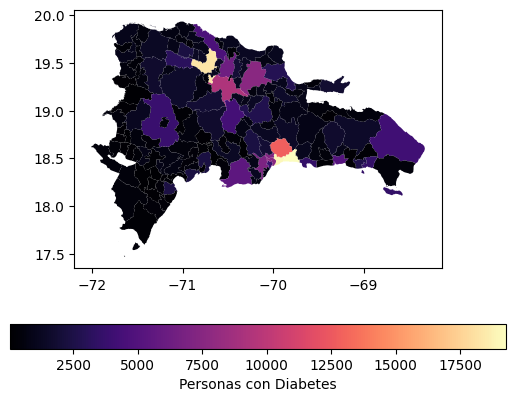

In [85]:
#Graficar mapa con escala de color divergente
salud_rd.plot(column = 'Diabetes',
              legend = True,
              legend_kwds={'label': "Personas con Diabetes",
                           'orientation': "horizontal"},
              cmap = 'magma')

## 4.2 Métodos

In [86]:
#Reproyectar PCS (metros) antes de realizar calculos
salud_rd = salud_rd.to_crs("EPSG:32619")

In [87]:
#Calcular los límites de los municipios
salud_rd.boundary

0      LINESTRING (397122.651 2050791.921, 397142.013...
1      MULTILINESTRING ((298172.939 2034259.341, 2983...
2      LINESTRING (333950.281 2046005.250, 334156.656...
3      MULTILINESTRING ((300647.656 2050014.250, 3006...
4      LINESTRING (303730.008 2102134.712, 303785.757...
                             ...                        
150    LINESTRING (399021.043 2069541.118, 399055.509...
151    MULTILINESTRING ((434029.413 2039143.947, 4340...
152    LINESTRING (434989.531 2065231.813, 435127.656...
153    LINESTRING (395110.177 2052726.033, 395111.107...
154    LINESTRING (379722.281 2071216.546, 379799.922...
Length: 155, dtype: geometry

<AxesSubplot:>

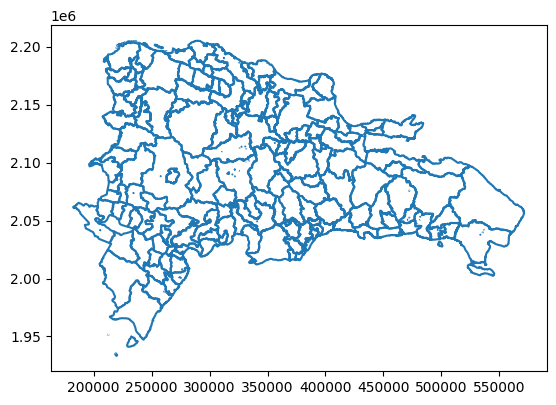

In [88]:
salud_rd.boundary.plot()

In [ ]:
salud_rd.head()

In [89]:
#Calcular el área de los municipios
salud_rd.area

0      8.990852e+07
1      4.161708e+08
2      2.464431e+08
3      4.310713e+08
4      5.744142e+08
           ...     
150    3.879029e+08
151    1.402356e+08
152    2.836423e+08
153    4.492134e+07
154    2.218025e+08
Length: 155, dtype: float64

<AxesSubplot:>

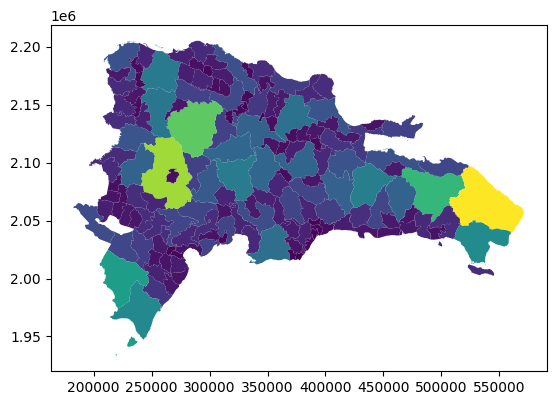

In [90]:
salud_rd['area_mun'] = salud_rd.area

salud_rd.plot(column = 'area_mun')

In [91]:
#Calcular el centroide de los municipios
salud_rd.centroid

0      POINT (400541.525 2044109.897)
1      POINT (308829.908 2037708.632)
2      POINT (336681.131 2034223.308)
3      POINT (289008.066 2058186.760)
4      POINT (298576.357 2080796.562)
                    ...              
150    POINT (403697.712 2057898.804)
151    POINT (435152.431 2040870.596)
152    POINT (430039.704 2054379.592)
153    POINT (390608.866 2048896.839)
154    POINT (384938.461 2059091.304)
Length: 155, dtype: geometry

<AxesSubplot:>

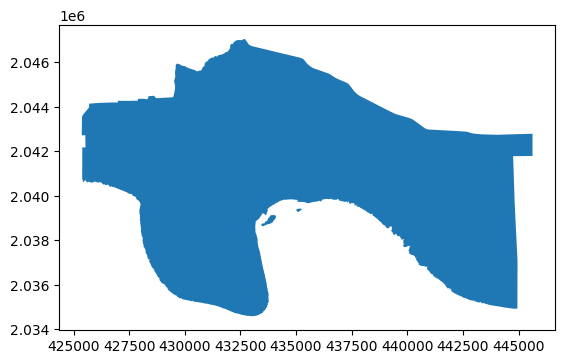

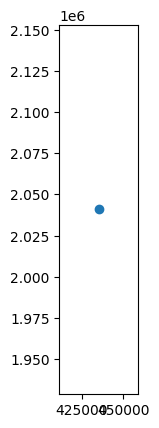

In [92]:
salud_rd.query('DES_MUNI == "BOCA CHICA"').plot()
salud_rd.query('DES_MUNI == "BOCA CHICA"').centroid.plot()

<AxesSubplot:>

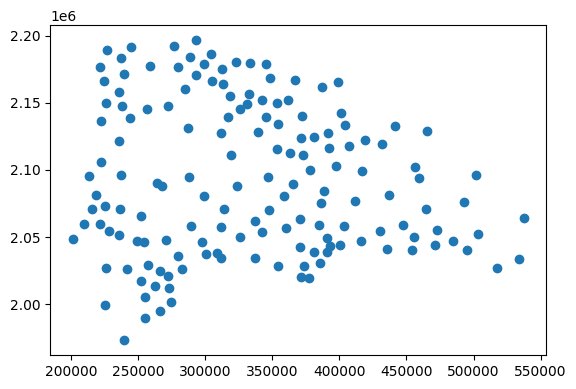

In [93]:
salud_rd.centroid.plot()

<AxesSubplot:>

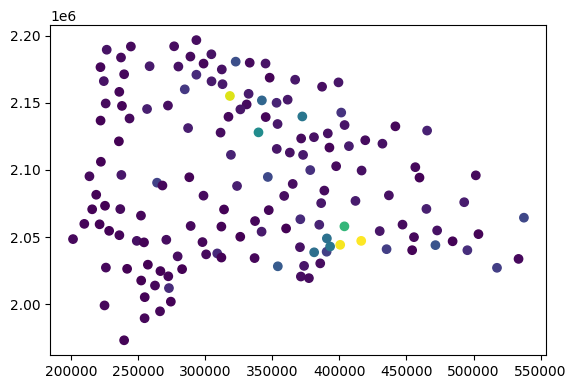

In [94]:
#Graficar la cantidad de personas con diabetes utilizando los centroides de los municipios
salud_rd['centroide'] = salud_rd.centroid

salud_rd.set_geometry('centroide').plot(column = 'Diabetes')

In [95]:
#Calcular la distancia (en metros) desde Boca Chica hacia el resto de los municipios
centroide_boca_chica = salud_rd.query('DES_MUNI == "BOCA CHICA"')['centroide'].iloc[0]

salud_rd.set_index('DES_MUNI').centroid.distance(centroide_boca_chica)

DES_MUNI
SANTO DOMINGO DE GUZMÁN     34762.161827
AZUA                       126362.090824
LAS CHARCAS                 98695.407770
LAS YAYAS DE VIAJAMA       147166.657882
PADRE LAS CASAS            142292.328857
                               ...      
SANTO DOMINGO NORTE         35768.131854
BOCA CHICA                      0.000000
SAN ANTONIO DE GUERRA       14444.131725
LOS ALCARRIZOS              45260.907595
PEDRO BRAND                 53417.572362
Length: 155, dtype: float64

## 4.3 Mapas con varias capas

<AxesSubplot:>

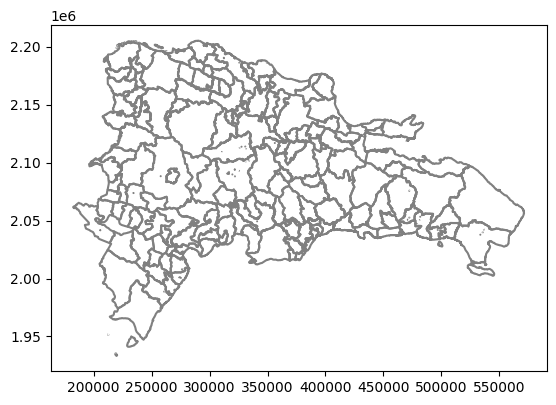

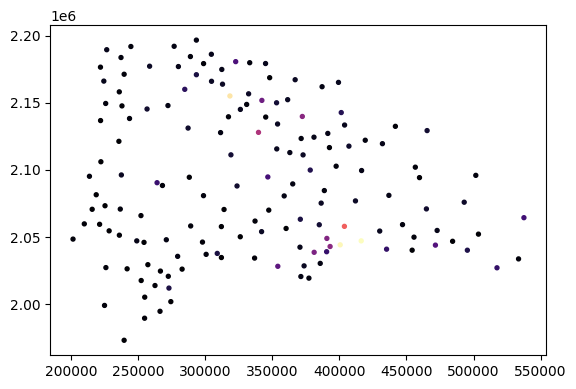

In [96]:
#¿Cómo se pueden combinar ambos mapas?
salud_rd.boundary.plot(color = "Gray")
salud_rd.set_geometry('centroide').plot(column = 'Diabetes',
                                        cmap = "magma",
                                        markersize = 8)

<AxesSubplot:>

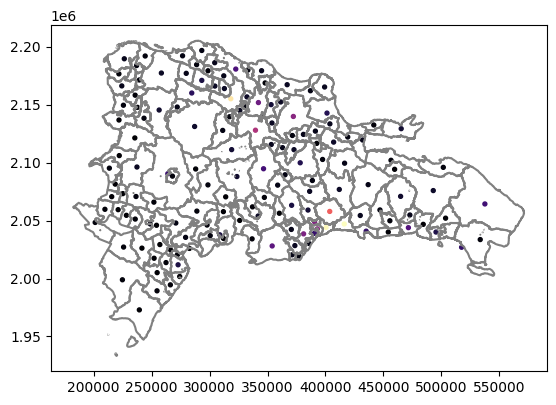

In [97]:
#Combinar 2 capas (límites y centroides de los municipios)
base = salud_rd.boundary.plot(color = "Gray")

salud_rd.set_geometry('centroide').plot(ax = base,
                                        column = 'Diabetes',
                                        cmap = "magma",
                                        markersize = 8)

# 5. Relaciones Espaciales



## 5.1 Relaciones entre objetos individuales

In [98]:
prov = geopandas.read_file('datos/censo_2020_one/PROVCenso2010.shp').to_crs('EPSG:32619')
mun = geopandas.read_file('datos/censo_2020_one/MUNCenso2010.shp').to_crs('EPSG:32619')

In [99]:
prov.head(3)

,PROV,REG,TOPONIMIA,ENLACE,geometry
0,01,10,DISTRITO NACIONAL,1001,"POLYGON ((397122.651 2050791.921, 397142.013 2..."
1,02,05,AZUA,0502,"POLYGON ((303931.923 2102011.319, 304050.231 2..."
2,03,06,BAORUCO,0603,"POLYGON ((228656.000 2064458.375, 228810.391 2..."


In [100]:
mun.head(3)

,PROV,MUN,REG,TOPONIMIA,ENLACE,geometry
0,01,01,10,SANTO DOMINGO DE GUZMÁN,100101,"POLYGON ((397122.651 2050791.921, 397142.013 2..."
1,02,01,05,AZUA,050201,"MULTIPOLYGON (((298172.939 2034259.341, 298374..."
2,02,02,05,LAS CHARCAS,050202,"POLYGON ((333950.281 2046005.250, 334156.656 2..."


In [101]:
padre_casas = mun.query('TOPONIMIA == "PADRE LAS CASAS"').centroid.item()

In [102]:
#Relación 1:1
#¿El Distrito Nacional contiene el centroide de Padre las Casas?
prov.query('TOPONIMIA == "DISTRITO NACIONAL"')['geometry'].contains(padre_casas)

0    False
dtype: bool

In [103]:
#¿Azua contiene el centroide de Padre las Casas?
prov.query('TOPONIMIA == "AZUA"')['geometry'].contains(padre_casas)

1    True
dtype: bool

## 5.2 Relaciones con GeoDataframes

In [104]:
#Relación 1:N
#¿Alguna provincia contiene a Padre las Casas?
prov.set_index('TOPONIMIA').contains(padre_casas)

TOPONIMIA
DISTRITO NACIONAL         False
AZUA                       True
BAORUCO                   False
BARAHONA                  False
DAJABÓN                   False
DUARTE                    False
ELÍAS PIÑA                False
EL SEIBO                  False
ESPAILLAT                 False
INDEPENDENCIA             False
LA ALTAGRACIA             False
LA ROMANA                 False
LA VEGA                   False
MARÍA TRINIDAD SÁNCHEZ    False
MONTE CRISTI              False
PEDERNALES                False
PERAVIA                   False
PUERTO PLATA              False
HERMANAS MIRABAL          False
SAMANÁ                    False
SAN CRISTÓBAL             False
SAN JUAN                  False
SAN PEDRO DE MACORÍS      False
SANCHEZ RAMÍREZ           False
SANTIAGO                  False
SANTIAGO RODRÍGUEZ        False
VALVERDE                  False
MONSEÑOR NOUEL            False
MONTE PLATA               False
HATO MAYOR                False
SAN JOSÉ DE OCOA          Fals

In [105]:
water = geopandas.read_file('datos/rd_waterways/hotosm_dom_waterways_lines.shp').to_crs('EPSG:32619')
water.head(3)

,osm_id,layer,name,source,covered,natural,waterway,tunnel,water,width,depth,blockage,geometry
0,25340547.0,None,Presa López Angostura,None,None,None,dam,None,None,None,None,None,"LINESTRING (319187.834 2139036.639, 319203.264..."
1,25340605.0,None,None,None,None,None,river,None,None,None,None,None,"LINESTRING (319397.462 2138868.169, 319472.276..."
2,25340610.0,None,None,None,None,None,river,None,None,None,None,None,"LINESTRING (316252.056 2137704.135, 316257.894..."


<AxesSubplot:>

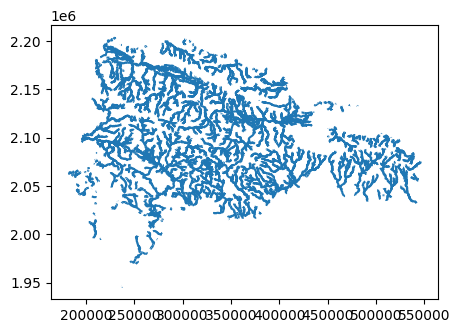

In [106]:
water.plot(figsize=(5,5))

In [107]:
rio_yasica = water.query('name in ("Río Yásica")').geometry
rio_yasica

3       LINESTRING (326169.982 2168013.091, 326178.385...
2040    LINESTRING (326164.455 2167994.968, 326169.982...
2041    LINESTRING (325940.998 2167933.916, 325953.001...
Name: geometry, dtype: geometry

In [ ]:
#Relación N:N
#¿Alguna provincia intersecta alguna sección del Río Yásica?
prov.geometry.apply(lambda x: x.intersects(rio_yasica.geometry))

8        ESPAILLAT
17    PUERTO PLATA
24        SANTIAGO
Name: TOPONIMIA, dtype: object


<AxesSubplot:>

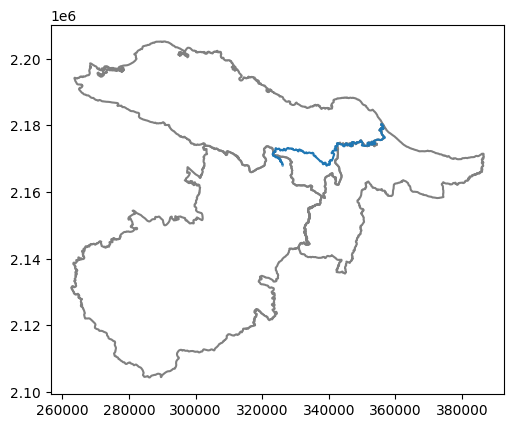

In [108]:
#¿Cómo podría presentar visualmente las provincias atravesadas por el Río Yásica?
resultados = prov.geometry.apply(lambda x: x.intersects(rio_yasica.geometry)).apply(any, axis=1)
prov_rio_yasica = prov[resultados]
print(prov_rio_yasica["TOPONIMIA"])

base = prov_rio_yasica.boundary.plot(color = 'gray')
rio_yasica.plot(ax = base)

## 5.3 Uniones Espaciales

In [ ]:
water.head(2)

In [ ]:
prov.head(2)

In [ ]:
#Cuando no contamos con IDs que nos permiten unir varias tablas
water_mun = geopandas.sjoin(water, prov, predicate = 'intersects', how = 'left')
water_mun.head(3)

In [ ]:
water_mun.query('name == "Río Yásica"')

# 6. Operaciones Espaciales

In [109]:
#Construir un área a la redonda (buffer)
water.query('name == "Río Yabacao"').buffer(1000)

1332    POLYGON ((416418.311 2054838.932, 416435.013 2...
2470    POLYGON ((446746.766 2080319.186, 446731.517 2...
dtype: geometry

<AxesSubplot:>

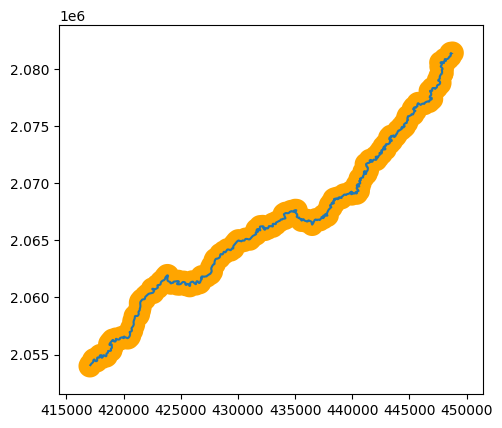

In [110]:
base = water.query('name == "Río Yabacao"').plot()

water.query('name == "Río Yabacao"').buffer(1000).plot(ax=base, color = 'orange')

   index       osm_id layer         name source covered natural waterway  \
0   1332  369743752.0  None  Río Yabacao   None    None    None    river   
1   2470  676943290.0  None  Río Yabacao   None    None    None    river   

  tunnel water width depth blockage  \
0   None  None  None  None     None   
1   None  None  None  None     None   

                                            geometry  
0  LINESTRING (447853.316 2079607.072, 447851.294...  
1  LINESTRING (448754.973 2081382.280, 448751.841...  


<AxesSubplot:>

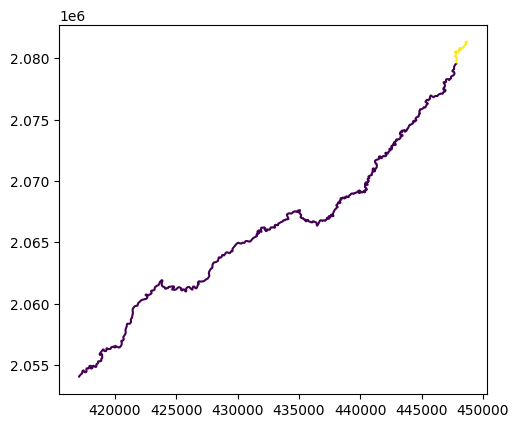

In [111]:
#Convertir 2 objetos geométricos en 1 (Unión)
rio_yabacao = water.query('name == "Río Yabacao"').reset_index()

print(rio_yabacao)
rio_yabacao.plot(column='index')

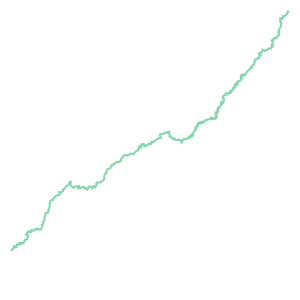

In [112]:
rio_yabacao_1 = water.query('name == "Río Yabacao"').reset_index().loc[0,'geometry']
rio_yabacao_2 = water.query('name == "Río Yabacao"').reset_index().loc[1,'geometry']

rio_yabacao_union = rio_yabacao_1.union(rio_yabacao_2)

rio_yabacao_union

In [ ]:
#Excluir parte de un objeto geómetrico que intersecta con otro
prov.difference(rio_yabacao_union.buffer(2000)).plot()